In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import math

In [2]:
cust= pd.read_csv('Customer Churn Data.csv')
cust.head(15)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile
5,20005,1,0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2,1.0,22,4,7,139,Computer
6,20006,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,121,Mobile
7,20007,1,0,1.0,6.0,Credit Card,Male,3.0,3,Regular Plus,2.0,Divorced,3,1.0,16,2,0,123,Mobile
8,20008,1,13,3.0,9.0,E wallet,Male,2.0,4,Regular Plus,3.0,Divorced,2,1.0,14,0,2,127,Mobile
9,20009,1,0,1.0,31.0,Debit Card,Male,2.0,5,Regular Plus,3.0,Single,2,0.0,12,1,1,123,Mobile


In [3]:
print('The number of rows (observations) is',cust.shape[0],'\n''The number of columns (variables) is',cust.shape[1])

The number of rows (observations) is 11260 
The number of columns (variables) is 19


In [4]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [5]:
cust_na = cust.isna().sum()
cust_na[cust_na.values > 0].sort_values(ascending=False)

cashback                471
Day_Since_CC_connect    357
Complain_ly             357
Login_device            221
Marital_Status          212
CC_Agent_Score          116
Account_user_count      112
City_Tier               112
Payment                 109
Gender                  108
rev_per_month           102
CC_Contacted_LY         102
Tenure                  102
Service_Score            98
account_segment          97
dtype: int64

In [6]:
cust.isnull().sum().sort_values(ascending = False)/cust.index.size

cashback                   0.041829
Day_Since_CC_connect       0.031705
Complain_ly                0.031705
Login_device               0.019627
Marital_Status             0.018828
CC_Agent_Score             0.010302
City_Tier                  0.009947
Account_user_count         0.009947
Payment                    0.009680
Gender                     0.009591
CC_Contacted_LY            0.009059
Tenure                     0.009059
rev_per_month              0.009059
Service_Score              0.008703
account_segment            0.008615
rev_growth_yoy             0.000000
coupon_used_for_payment    0.000000
Churn                      0.000000
AccountID                  0.000000
dtype: float64

In [7]:
cust = cust.drop(["AccountID"], axis=1)
cust.head(5)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile


In [8]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  object 
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

<AxesSubplot:>

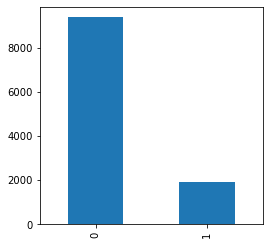

In [9]:
cust['Churn'].value_counts().plot(kind='bar',figsize=(4,4))

In [10]:
cust.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Churn,11260,NaN,NaN,NaN,0.168384,0.374223,0,0,0,0,1
Tenure,11158,38,1,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148,NaN,NaN,NaN,1.65393,0.915015,1,1,1,3,3
CC_Contacted_LY,11158,NaN,NaN,NaN,17.8671,8.85327,4,11,16,23,132
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162,NaN,NaN,NaN,2.90253,0.725584,0,2,3,3,5
Account_user_count,11148,7,4,4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC_Agent_Score,11144,NaN,NaN,NaN,3.06649,1.37977,1,2,3,4,5


In [11]:
cust["Gender"] = cust["Gender"].replace("M", 'Male').replace("F", 'Female')

In [12]:
cust["account_segment"] = cust["account_segment"].replace("Regular +", 'Regular Plus').replace("Super +", 'Super Plus')

In [13]:
cust['Account_user_count'] = pd.to_numeric(cust['Account_user_count'],errors='coerce')

In [14]:
cust['Tenure'] = pd.to_numeric(cust['Tenure'],errors='coerce')

In [15]:
cust['rev_per_month'] = pd.to_numeric(cust['rev_per_month'],errors='coerce')

In [16]:
cust['rev_growth_yoy'] = pd.to_numeric(cust['rev_growth_yoy'],errors='coerce')

In [17]:
cust['Day_Since_CC_connect'] = pd.to_numeric(cust['Day_Since_CC_connect'],errors='coerce')

In [18]:
cust["Login_device"] = cust["Login_device"].replace("&&&&", 'No_info')

In [19]:
cust['coupon_used_for_payment'] = pd.to_numeric(cust['coupon_used_for_payment'],errors='coerce')

In [20]:
cust['cashback'] = pd.to_numeric(cust['cashback'],errors='coerce')

In [21]:
cust.head(15)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,160.0,Mobile
1,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,121.0,Mobile
2,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,NaN,Mobile
3,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.0,Mobile
4,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,130.0,Mobile
5,1,0.0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2.0,1.0,22.0,4.0,7.0,139.0,Computer
6,1,2.0,3.0,11.0,Cash on Delivery,Male,2.0,3.0,Super,2.0,Divorced,4.0,0.0,14.0,0.0,0.0,121.0,Mobile
7,1,0.0,1.0,6.0,Credit Card,Male,3.0,3.0,Regular Plus,2.0,Divorced,3.0,1.0,16.0,2.0,0.0,123.0,Mobile
8,1,13.0,3.0,9.0,E wallet,Male,2.0,4.0,Regular Plus,3.0,Divorced,2.0,1.0,14.0,0.0,2.0,127.0,Mobile
9,1,0.0,1.0,31.0,Debit Card,Male,2.0,5.0,Regular Plus,3.0,Single,2.0,0.0,12.0,1.0,1.0,123.0,Mobile


In [22]:
cust.describe(include="all")["Churn"]

count     11260.000000
unique             NaN
top                NaN
freq               NaN
mean          0.168384
std           0.374223
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Churn, dtype: float64

In [23]:
cust.skew()

Churn                      1.772606
Tenure                     3.895707
City_Tier                  0.737107
CC_Contacted_LY            1.422977
Service_Score              0.003891
Account_user_count        -0.393100
CC_Agent_Score            -0.142149
rev_per_month              9.093909
Complain_ly                0.950876
rev_growth_yoy             0.752474
coupon_used_for_payment    2.575199
Day_Since_CC_connect       1.273021
cashback                   8.771302
dtype: float64

In [24]:
missing_count = cust.isnull().sum() # the count of missing value
missing_df = pd.DataFrame({'count' : missing_count}) # create a dataframe
missing_df

,count
Churn,0
Tenure,218
City_Tier,112
CC_Contacted_LY,102
Payment,109
Gender,108
Service_Score,98
Account_user_count,444
account_segment,97
CC_Agent_Score,116


In [25]:
cust.isnull().sum().sort_values(ascending = False)/cust.index.size

rev_per_month              0.070249
cashback                   0.042007
Account_user_count         0.039432
Day_Since_CC_connect       0.031794
Complain_ly                0.031705
Login_device               0.019627
Tenure                     0.019361
Marital_Status             0.018828
CC_Agent_Score             0.010302
City_Tier                  0.009947
Payment                    0.009680
Gender                     0.009591
CC_Contacted_LY            0.009059
Service_Score              0.008703
account_segment            0.008615
rev_growth_yoy             0.000266
coupon_used_for_payment    0.000266
Churn                      0.000000
dtype: float64

In [26]:
cust['Payment'] = cust['Payment'].fillna("No_info")
cust['Gender'] = cust['Gender'].fillna("No_info")
cust['account_segment'] = cust['account_segment'].fillna("No_info")
cust['Marital_Status'] = cust['Marital_Status'].fillna("No_info")
cust['Login_device'] = cust['Login_device'].fillna("No_info")

In [27]:
for column in ['City_Tier', 'Account_user_count', 'Service_Score', 'CC_Agent_Score','CC_Contacted_LY','Complain_ly','rev_per_month','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback','Tenure']:
    cust[column].fillna(cust[column].mode()[0], inplace=True)

In [28]:
missing_count = cust.isnull().sum() # the count of missing value
missing_df = pd.DataFrame({'count' : missing_count}) # create a dataframe
missing_df

,count
Churn,0
Tenure,0
City_Tier,0
CC_Contacted_LY,0
Payment,0
Gender,0
Service_Score,0
Account_user_count,0
account_segment,0
CC_Agent_Score,0


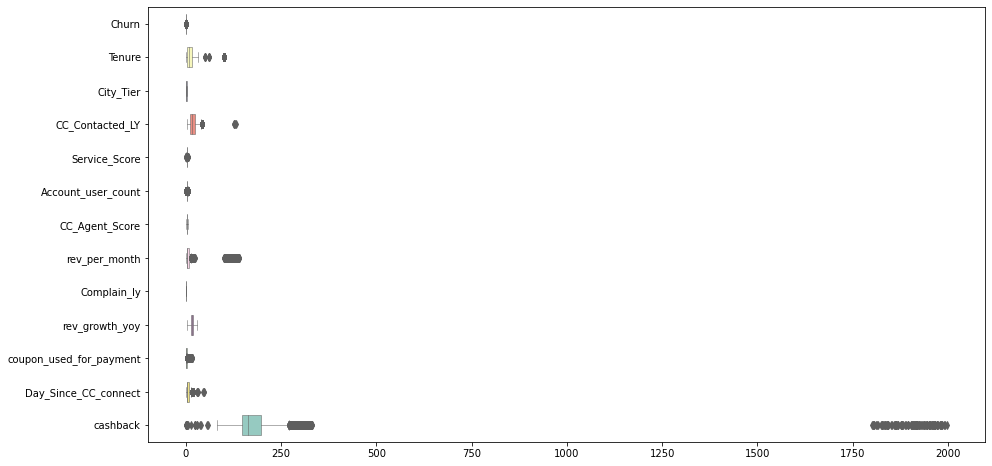

In [29]:
f, ax = plt.subplots(figsize=(15,8))
ax = sns.boxplot(data=cust,width=0.6,palette="Set3",orient='h',linewidth=0.5)

In [30]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [31]:
for feature in cust[['CC_Contacted_LY','rev_per_month','coupon_used_for_payment','cashback','Day_Since_CC_connect']]:
    lr,ur=treat_outlier(cust[feature])
    cust[feature]=np.where(cust[feature]>ur,ur,cust[feature])
    cust[feature]=np.where(cust[feature]<lr,lr,cust[feature])

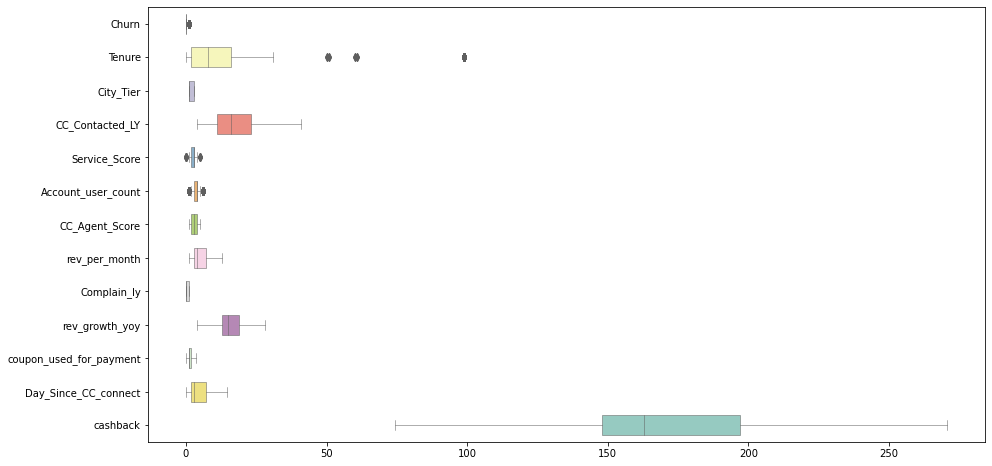

In [32]:
f, ax = plt.subplots(figsize=(15,8))
ax = sns.boxplot(data=cust,width=0.6,palette="Set3",orient='h',linewidth=0.5)

<AxesSubplot:>

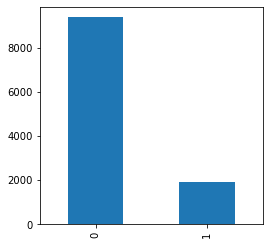

In [33]:
cust['Churn'].value_counts().plot(kind='bar',figsize=(4,4))

<AxesSubplot:>

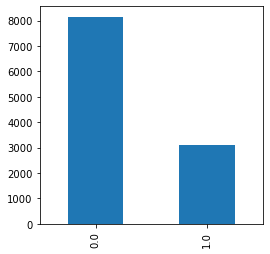

In [75]:
cust['Complain_ly'].value_counts().plot(kind='bar',figsize=(4,4))

<AxesSubplot:>

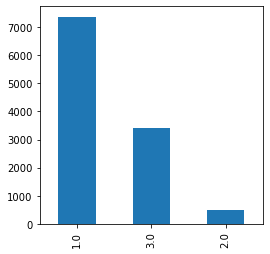

In [34]:
cust['City_Tier'].value_counts().plot(kind='bar',figsize=(4,4))

<AxesSubplot:>

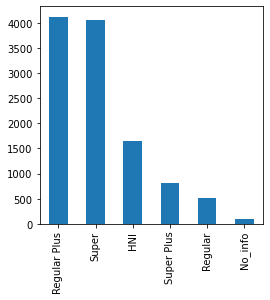

In [35]:
cust['account_segment'].value_counts().plot(kind='bar',figsize=(4,4))

<AxesSubplot:>

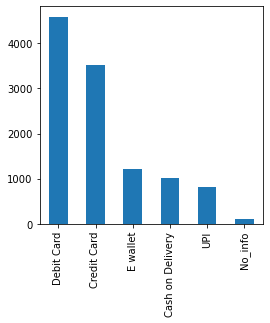

In [36]:
cust['Payment'].value_counts().plot(kind='bar',figsize=(4,4))

<AxesSubplot:>

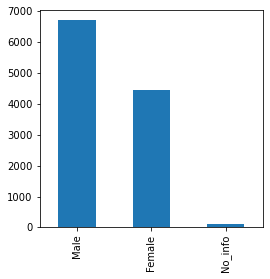

In [37]:
cust['Gender'].value_counts().plot(kind='bar',figsize=(4,4))

<AxesSubplot:>

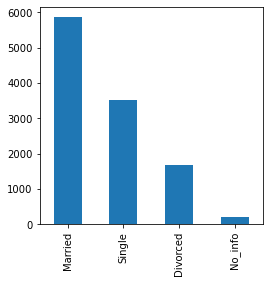

In [38]:
cust['Marital_Status'].value_counts().plot(kind='bar',figsize=(4,4))

<AxesSubplot:>

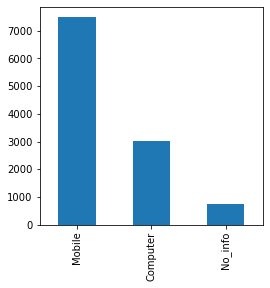

In [39]:
cust['Login_device'].value_counts().plot(kind='bar',figsize=(4,4))

<AxesSubplot:>

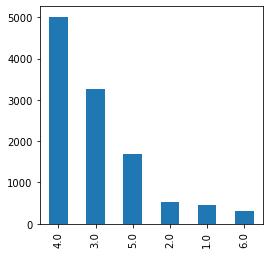

In [40]:
cust['Account_user_count'].value_counts().plot(kind='bar',figsize=(4,4))

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will 

Text(0.5, 1.0, 'CC_Agent_Score Boxplot')

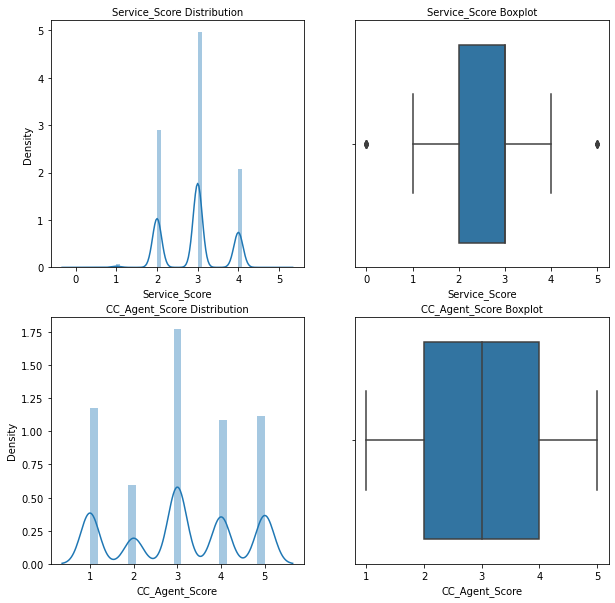

In [41]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,10)

a = sns.distplot(cust['Service_Score'] , ax=axes[0][0])
a.set_title("Service_Score Distribution",fontsize=10)
a = sns.boxplot(cust['Service_Score'] , orient = "v" , ax=axes[0][1])
a.set_title("Service_Score Boxplot",fontsize=10)

a=sns.distplot(cust['CC_Agent_Score'], ax=axes[1][0])
a.set_title("CC_Agent_Score Distribution",fontsize=10)
a=sns.boxplot(cust['CC_Agent_Score'],orient="v", ax=axes[1][1])
a.set_title("CC_Agent_Score Boxplot", fontsize=10)


C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will 

Text(0.5, 1.0, 'Complain_ly Boxplot')

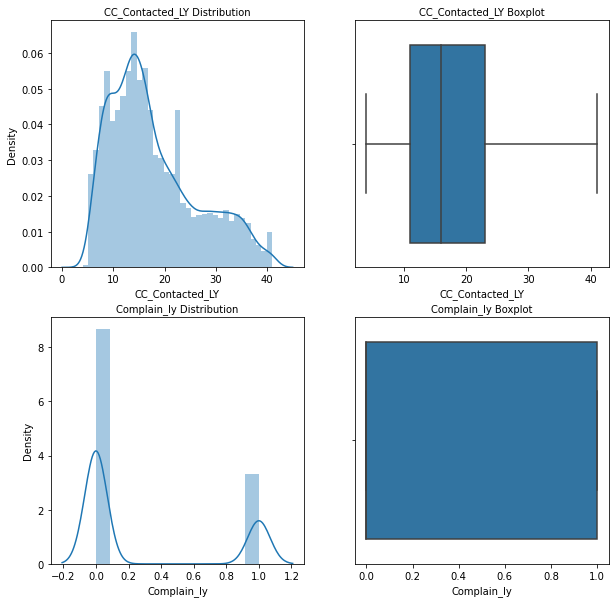

In [42]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,10)

a = sns.distplot(cust['CC_Contacted_LY'] , ax=axes[0][0])
a.set_title("CC_Contacted_LY Distribution",fontsize=10)
a = sns.boxplot(cust['CC_Contacted_LY'] , orient = "v" , ax=axes[0][1])
a.set_title("CC_Contacted_LY Boxplot",fontsize=10)

a=sns.distplot(cust['Complain_ly'], ax=axes[1][0])
a.set_title("Complain_ly Distribution",fontsize=10)
a=sns.boxplot(cust['Complain_ly'],orient="v", ax=axes[1][1])
a.set_title("Complain_ly Boxplot", fontsize=10)


C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will 

Text(0.5, 1.0, 'Rev_growth_yoy Boxplot')

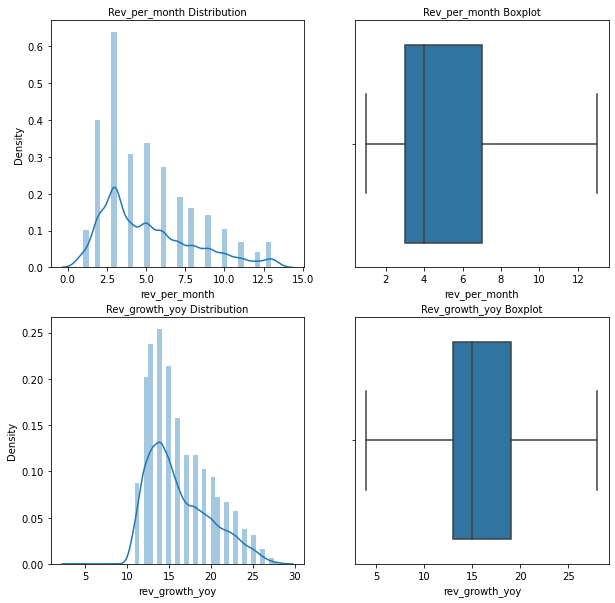

In [43]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,10)

a = sns.distplot(cust['rev_per_month'] , ax=axes[0][0])
a.set_title("Rev_per_month Distribution",fontsize=10)
a = sns.boxplot(cust['rev_per_month'] , orient = "v" , ax=axes[0][1])
a.set_title("Rev_per_month Boxplot",fontsize=10)

a = sns.distplot(cust['rev_growth_yoy'] , ax=axes[1][0])
a.set_title("Rev_growth_yoy Distribution",fontsize=10)
a = sns.boxplot(cust['rev_growth_yoy'] , orient = "v" , ax=axes[1][1])
a.set_title("Rev_growth_yoy Boxplot",fontsize=10)

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will 

Text(0.5, 1.0, 'Day_Since_CC_connect Boxplot')

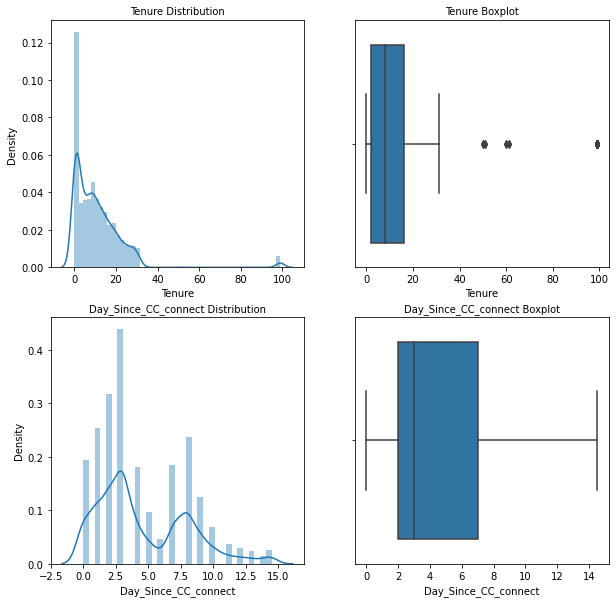

In [44]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,10)

a = sns.distplot(cust['Tenure'] , ax=axes[0][0])
a.set_title("Tenure Distribution",fontsize=10)
a = sns.boxplot(cust['Tenure'] , orient = "v" , ax=axes[0][1])
a.set_title("Tenure Boxplot",fontsize=10)

a = sns.distplot(cust['Day_Since_CC_connect'] , ax=axes[1][0])
a.set_title("Day_Since_CC_connect Distribution",fontsize=10)
a = sns.boxplot(cust['Day_Since_CC_connect'] , orient = "v" , ax=axes[1][1])
a.set_title("Day_Since_CC_connect Boxplot",fontsize=10)

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will 

Text(0.5, 1.0, 'Coupon_used_for_payment Boxplot')

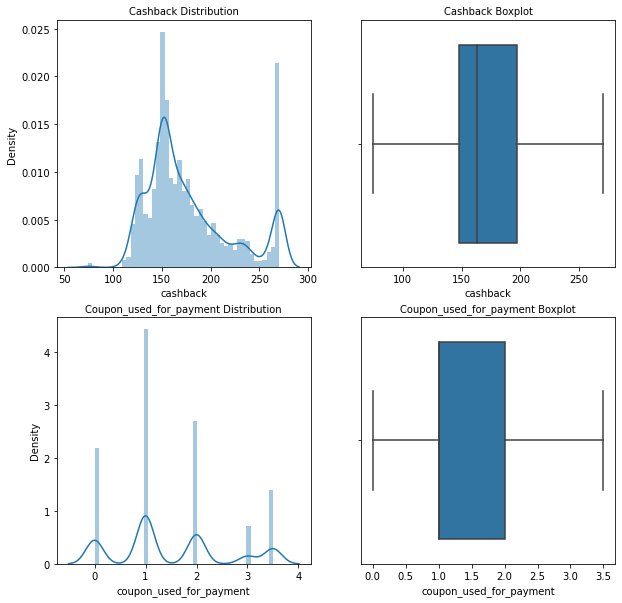

In [45]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,10)

a = sns.distplot(cust['cashback'] , ax=axes[0][0])
a.set_title("Cashback Distribution",fontsize=10)
a = sns.boxplot(cust['cashback'] , orient = "v" , ax=axes[0][1])
a.set_title("Cashback Boxplot",fontsize=10)

a = sns.distplot(cust['coupon_used_for_payment'] , ax=axes[1][0])
a.set_title("Coupon_used_for_payment Distribution",fontsize=10)
a = sns.boxplot(cust['coupon_used_for_payment'] , orient = "v" , ax=axes[1][1])
a.set_title("Coupon_used_for_payment Boxplot",fontsize=10)

In [46]:
Tenure_Group=pd.cut(cust.Tenure,bins=[0,12,24,36,48,60,99],labels=['1st Year','2nd Year','3rd Year','4th Year','5th Year','>5 years'])
cust.insert(7,'Tenure Group',Tenure_Group)


In [47]:
cust.tail(20)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Tenure Group,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11240,0,9.0,2.0,38.0,Debit Card,Female,3.0,1st Year,4.0,HNI,1.0,Single,3.0,1.0,17.0,2.0,8.0,213.0,No_info
11241,0,12.0,3.0,19.0,Debit Card,Female,4.0,1st Year,4.0,Super,1.0,Married,4.0,0.0,12.0,1.0,10.0,181.0,Mobile
11242,1,14.0,3.0,13.0,No_info,Male,4.0,2nd Year,4.0,Super,3.0,Married,11.0,0.0,13.0,2.0,2.0,197.0,No_info
11243,0,10.0,3.0,20.0,E wallet,Female,4.0,1st Year,5.0,Super,1.0,Married,9.0,0.0,15.0,2.0,1.0,194.0,Mobile
11244,0,19.0,3.0,29.0,Debit Card,Female,3.0,2nd Year,4.0,Super,3.0,Single,12.0,0.0,18.0,1.0,2.0,175.0,Mobile
11245,0,14.0,1.0,14.0,Debit Card,Male,1.0,2nd Year,5.0,Regular Plus,3.0,Single,6.0,0.0,16.0,1.0,3.0,153.0,Mobile
11246,0,9.0,1.0,29.0,Debit Card,Male,4.0,1st Year,4.0,Super,3.0,Married,3.0,1.0,16.0,1.0,3.0,187.0,Computer
11247,0,14.0,1.0,12.0,Credit Card,Female,4.0,2nd Year,4.0,Regular Plus,3.0,Married,3.0,0.0,15.0,1.0,3.0,145.0,Mobile
11248,0,9.0,1.0,13.0,Debit Card,Female,4.0,1st Year,6.0,Regular Plus,1.0,Married,6.0,0.0,15.0,2.0,2.0,158.0,Mobile
11249,0,3.0,1.0,23.0,UPI,Male,3.0,1st Year,5.0,Super,4.0,Married,8.0,1.0,14.0,1.0,4.0,171.0,Mobile


In [48]:
tenure_churn_table = pd.crosstab(index=cust["Tenure Group"], columns=cust["Churn"])
tenure_churn_table

Churn,0,1
Tenure Group,,
1st Year,5115,1023
2nd Year,2721,180
3rd Year,851,0
5th Year,6,0
>5 years,109,24


<AxesSubplot:xlabel='Tenure Group'>

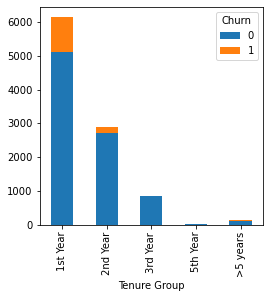

In [49]:
tenure_churn_table.plot(kind="bar", figsize=(4,4),stacked=True)

In [50]:
servscore_churn_table = pd.crosstab(index=cust["Service_Score"], columns=cust["Churn"])
servscore_churn_table


Churn,0,1
Service_Score,,
0.0,8,0
1.0,77,0
2.0,2701,550
3.0,4636,952
4.0,1937,394
5.0,5,0


<AxesSubplot:xlabel='Service_Score'>

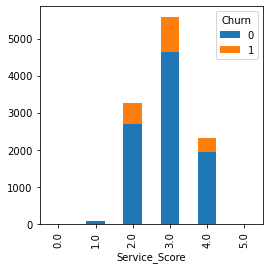

In [51]:
servscore_churn_table.plot(kind="bar", figsize=(4,4),stacked=True)

In [52]:
CCscore_churn_table = pd.crosstab(index=cust["CC_Agent_Score"], columns=cust["Churn"])
CCscore_churn_table


Churn,0,1
CC_Agent_Score,,
1.0,2038,264
2.0,1017,147
3.0,2877,599
4.0,1763,364
5.0,1669,522


<AxesSubplot:xlabel='CC_Agent_Score'>

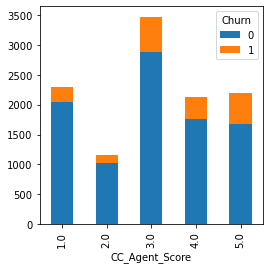

In [53]:
CCscore_churn_table.plot(kind="bar", figsize=(4,4),stacked=True)

<AxesSubplot:xlabel='Login_device'>

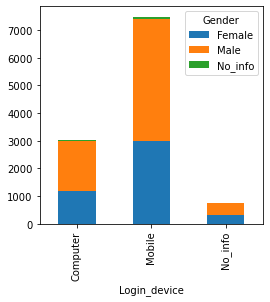

In [54]:
gender_device_table = pd.crosstab(index=cust["Login_device"], columns=cust["Gender"])
gender_device_table.plot(kind="bar", figsize=(4,4),stacked=True)

<AxesSubplot:xlabel='account_segment'>

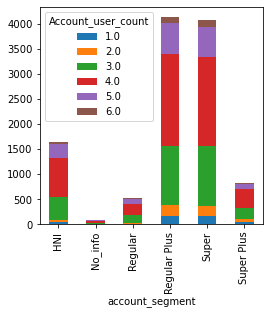

In [55]:
accountusers_segment_table = pd.crosstab(index=cust["account_segment"], columns=cust["Account_user_count"])
accountusers_segment_table.plot(kind="bar", figsize=(4,4),stacked=True)

In [56]:
accountusers_segment_table

Account_user_count,1.0,2.0,3.0,4.0,5.0,6.0
account_segment,,,,,,
HNI,42,50,463,774,273,37
No_info,0,3,27,46,18,3
Regular,10,15,160,231,84,20
Regular Plus,177,206,1177,1828,622,114
Super,170,200,1201,1768,592,131
Super Plus,47,52,233,366,110,10


<AxesSubplot:xlabel='account_segment'>

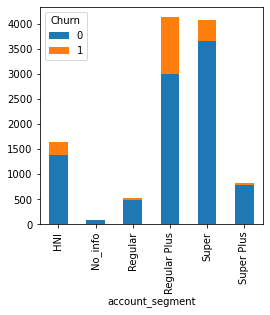

In [57]:
churn_segment_table = pd.crosstab(index=cust["account_segment"], columns=cust["Churn"])
churn_segment_table.plot(kind="bar", figsize=(4,4),stacked=True)

<AxesSubplot:xlabel='Complain_ly'>

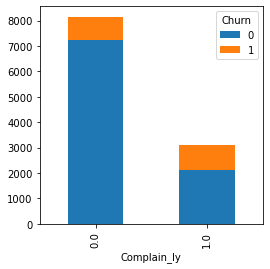

In [58]:
churn_segment_table = pd.crosstab(index=cust["Complain_ly"], columns=cust["Churn"])
churn_segment_table.plot(kind="bar", figsize=(4,4),stacked=True)

In [59]:
Cashback_Group=pd.cut(cust.cashback,bins=[0,50,100,150,200,250,300],labels=['<=50','51-100','101-150','151-200','201-250','251-300'])
cust.insert(11,'Cashback Group',Cashback_Group)

In [60]:
cust.head(35)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Tenure Group,Account_user_count,account_segment,CC_Agent_Score,Cashback Group,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.0,3.0,6.0,Debit Card,Female,3.0,1st Year,3.0,Super,2.0,151-200,Single,9.0,1.0,11.0,1.0,5.0,160.0,Mobile
1,1,0.0,1.0,8.0,UPI,Male,3.0,NaN,4.0,Regular Plus,3.0,101-150,Single,7.0,1.0,15.0,0.0,0.0,121.0,Mobile
2,1,0.0,1.0,30.0,Debit Card,Male,2.0,NaN,4.0,Regular Plus,3.0,151-200,Single,6.0,1.0,14.0,0.0,3.0,152.0,Mobile
3,1,0.0,3.0,15.0,Debit Card,Male,2.0,NaN,4.0,Super,5.0,101-150,Single,8.0,0.0,23.0,0.0,3.0,134.0,Mobile
4,1,0.0,1.0,12.0,Credit Card,Male,2.0,NaN,3.0,Regular Plus,5.0,101-150,Single,3.0,0.0,11.0,1.0,3.0,130.0,Mobile
5,1,0.0,1.0,22.0,Debit Card,Female,3.0,NaN,4.0,Regular Plus,5.0,101-150,Single,2.0,1.0,22.0,3.5,7.0,139.0,Computer
6,1,2.0,3.0,11.0,Cash on Delivery,Male,2.0,1st Year,3.0,Super,2.0,101-150,Divorced,4.0,0.0,14.0,0.0,0.0,121.0,Mobile
7,1,0.0,1.0,6.0,Credit Card,Male,3.0,NaN,3.0,Regular Plus,2.0,101-150,Divorced,3.0,1.0,16.0,2.0,0.0,123.0,Mobile
8,1,13.0,3.0,9.0,E wallet,Male,2.0,2nd Year,4.0,Regular Plus,3.0,101-150,Divorced,2.0,1.0,14.0,0.0,2.0,127.0,Mobile
9,1,0.0,1.0,31.0,Debit Card,Male,2.0,NaN,5.0,Regular Plus,3.0,101-150,Single,2.0,0.0,12.0,1.0,1.0,123.0,Mobile


In [61]:
churn_cashback_table = pd.crosstab(index=cust["Cashback Group"], columns=cust["Churn"])
churn_cashback_table

Churn,0,1
Cashback Group,,
51-100,22,0
101-150,2458,820
151-200,4498,783
201-250,1180,210
251-300,1206,83


<AxesSubplot:xlabel='Cashback Group'>

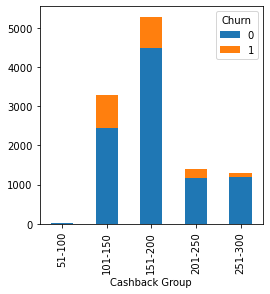

In [62]:
churn_cashback_table.plot(kind="bar", figsize=(4,4),stacked=True)

<AxesSubplot:xlabel='Account_user_count'>

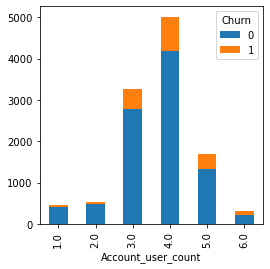

In [63]:
churn_accountusers_table = pd.crosstab(index=cust["Account_user_count"], columns=cust["Churn"])
churn_accountusers_table.plot(kind="bar", figsize=(4,4),stacked=True)

In [64]:
coupon_churn_table = pd.crosstab(index=cust["coupon_used_for_payment"], columns=cust["Churn"])
coupon_churn_table

Churn,0,1
coupon_used_for_payment,,
0.0,1776,374
1.0,3616,760
2.0,2210,446
3.0,602,96
3.5,1160,220


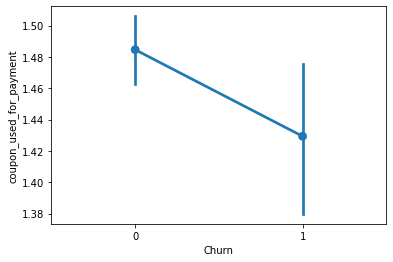

In [65]:
sns.pointplot(x = "Churn",
              y = "coupon_used_for_payment",
              data = cust)

plt.show()

<AxesSubplot:xlabel='Payment'>

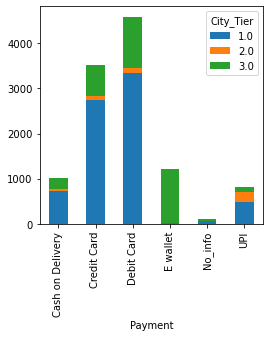

In [66]:
tier_paymeth_table = pd.crosstab(index=cust["Payment"], columns=cust["City_Tier"])
tier_paymeth_table.plot(kind="bar", figsize=(4,4),stacked=True)

In [67]:
tier_churn_table = pd.crosstab(index=cust["City_Tier"], columns=cust["Churn"])
tier_churn_table

Churn,0,1
City_Tier,,
1.0,6302,1073
2.0,384,96
3.0,2678,727


<AxesSubplot:xlabel='City_Tier'>

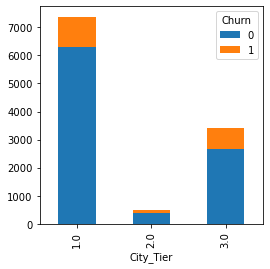

In [68]:
tier_churn_table.plot(kind="bar", figsize=(4,4),stacked=True)

In [69]:
cust = cust.drop(["Tenure Group"],axis=1)

In [70]:
cust = cust.drop(["Cashback Group"],axis=1)

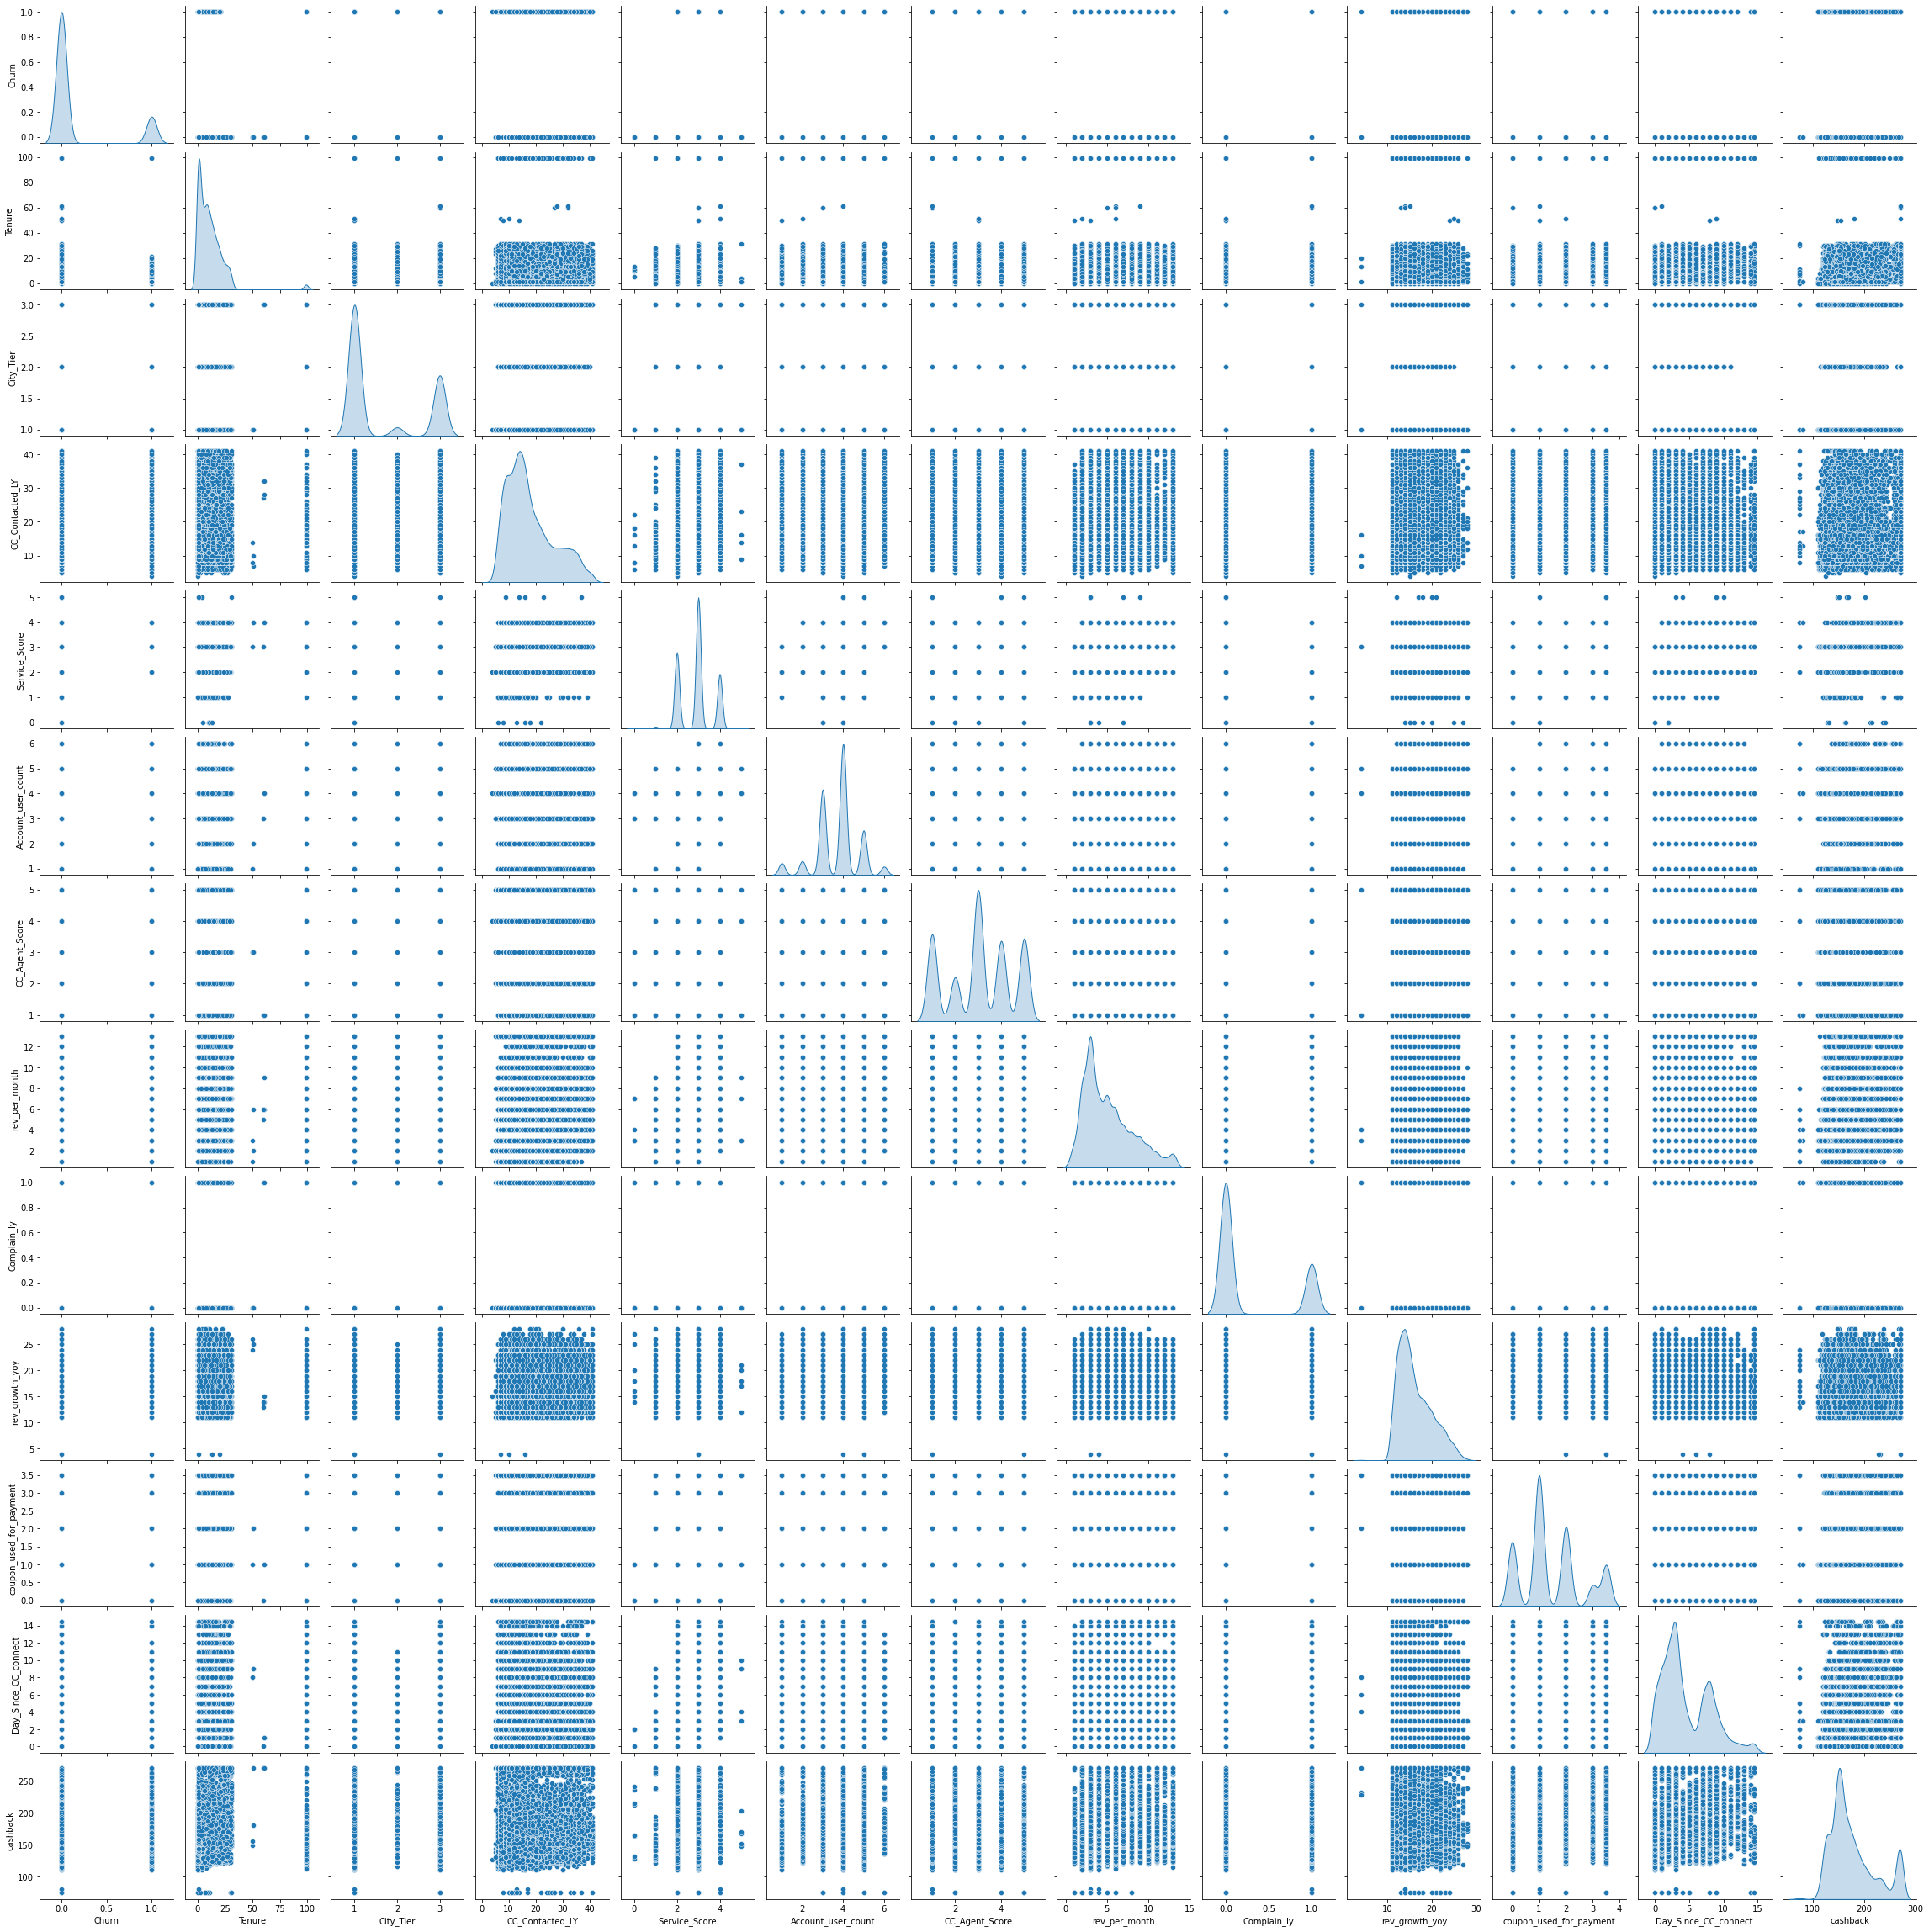

In [71]:
sns.pairplot(cust,diag_kind='kde')

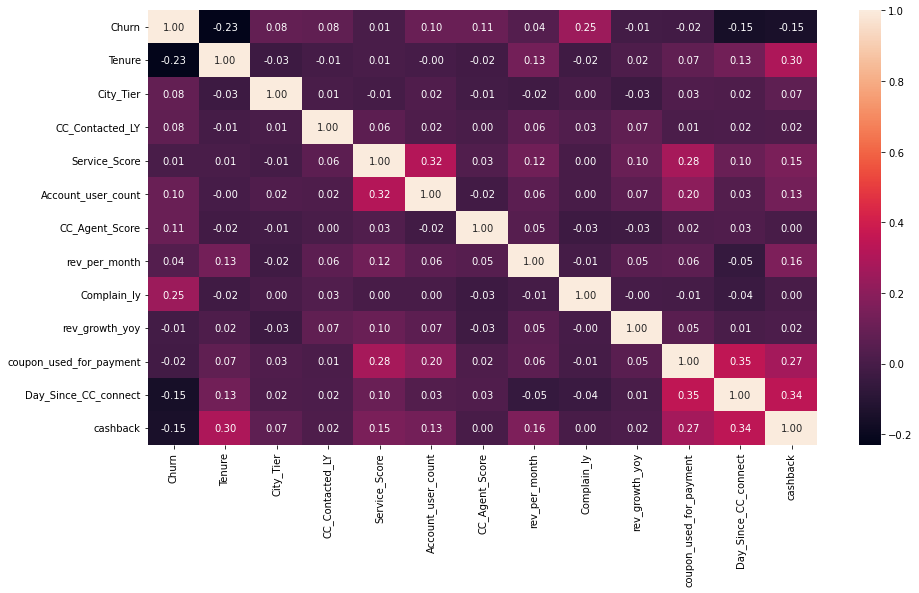

In [73]:
plt.figure(figsize=(15,8))
sns.heatmap(cust.corr(),annot=True,fmt=".2f");